In [1]:
import gymnasium as gym
import matplotlib.pyplot as plt
import torch

from __OLD__.src.Agent import PPOAgent

In [2]:
# THE GAME: https://www.gymlibrary.dev/environments/classic_control/cart_pole/#rewards
env = gym.make('CartPole-v1')

input_dim = env.observation_space.shape[0]
output_dim = env.action_space.n

gamma = 0.99
lmbda = 0.925
epsilon = 0.2  
policy_lr = 0.001
value_lr = 0.001
num_policy_epochs = 4
num_value_epochs = 4
smoothing_const = 1e-8
normalize_advantages = True

Agent = PPOAgent(env=env,
                 state_space_size=input_dim,
                 action_space_size=output_dim,
                 gamma=gamma,
                 lmbda=lmbda,
                 epsilon=epsilon,
                 smooting_const=smoothing_const,
                 normalize_advantages=normalize_advantages)

In [3]:
# Trying to interact w. env. before training
Agent.play(render=False)

####################################
# --- Survived for: 9 episodes --- #
####################################


In [4]:
num_episodes = 20
accumulated_reward = Agent.train(episodes=num_episodes,
                                 policy_lr=policy_lr,
                                 value_lr=value_lr,
                                 num_policy_epochs=num_policy_epochs,
                                 num_value_epochs=num_value_epochs)

100%|██████████| 20/20 [00:02<00:00,  9.46it/s]


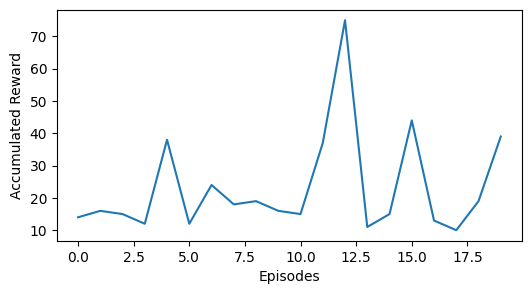

In [5]:
fig, ax = plt.subplots(1,1, figsize=(6,3))
ax.plot([e for e in range(len(accumulated_reward))], accumulated_reward)
ax.set_xlabel('Episodes')
ax.set_ylabel('Accumulated Reward')
plt.show()

In [6]:
# Trying to interact w. env. after training
Agent.play(render=False)

####################################
# --- Survived for: 9 episodes --- #
####################################
